## Unsupervised Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing

### Data Directory

In [2]:
INPUT_DIR = '../data/raw/CMAPSSData/'
OUTPUT_DIR = '../data/interim/'

### Read the input data

In [3]:
input_file = INPUT_DIR + 'train_FD002.txt'
col_headers = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21', 'meas22', 'meas23', 'meas24', 'meas25', 'meas26']

df = pd.read_csv(input_file, header=None, sep=' ', names=col_headers)

In [4]:
df.head()

unit  time_cycles  setting1  setting2  setting3  meas01  meas02   meas03  \
0     1            1   34.9983    0.8400     100.0  449.44  555.32  1358.61   
1     1            2   41.9982    0.8408     100.0  445.00  549.90  1353.22   
2     1            3   24.9988    0.6218      60.0  462.54  537.31  1256.76   
3     1            4   42.0077    0.8416     100.0  445.00  549.51  1354.03   
4     1            5   25.0005    0.6203      60.0  462.54  537.07  1257.71   

    meas04  meas05   ...    meas17  meas18  meas19  meas20  meas21  meas22  \
0  1137.23    5.48   ...       334    2223  100.00   14.73  8.8071     NaN   
1  1125.78    3.91   ...       330    2212  100.00   10.41  6.2665     NaN   
2  1047.45    7.05   ...       309    1915   84.93   14.08  8.6723     NaN   
3  1126.38    3.91   ...       329    2212  100.00   10.59  6.4701     NaN   
4  1047.93    7.05   ...       309    1915   84.93   14.13  8.5286     NaN   

   meas23  meas24  meas25  meas26  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN  

[5 rows x 31 columns]

### Features to use

In [5]:
id_cols = ['unit', 'time_cycles']
feature_set = ['setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21']

In [6]:
cols = feature_set + id_cols

In [7]:
print(cols)

['setting1', 'setting2', 'setting3', 'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 'meas21', 'unit', 'time_cycles']


In [8]:
df = df[cols]

In [9]:
df.head()

setting1  setting2  setting3  meas01  meas02   meas03   meas04  meas05  \
0   34.9983    0.8400     100.0  449.44  555.32  1358.61  1137.23    5.48   
1   41.9982    0.8408     100.0  445.00  549.90  1353.22  1125.78    3.91   
2   24.9988    0.6218      60.0  462.54  537.31  1256.76  1047.45    7.05   
3   42.0077    0.8416     100.0  445.00  549.51  1354.03  1126.38    3.91   
4   25.0005    0.6203      60.0  462.54  537.07  1257.71  1047.93    7.05   

   meas06  meas07     ...        meas14   meas15  meas16  meas17  meas18  \
0    8.00  194.64     ...       8048.56   9.3461    0.02     334    2223   
1    5.71  138.51     ...       8072.30   9.3774    0.02     330    2212   
2    9.02  175.71     ...       7864.87  10.8941    0.02     309    1915   
3    5.71  138.46     ...       8068.66   9.3528    0.02     329    2212   
4    9.03  175.05     ...       7861.23  10.8963    0.02     309    1915   

   meas19  meas20  meas21  unit  time_cycles  
0  100.00   14.73  8.8071     1            1  
1  100.00   10.41  6.2665     1            2  
2   84.93   14.08  8.6723     1            3  
3  100.00   10.59  6.4701     1            4  
4   84.93   14.13  8.5286     1            5  

[5 rows x 26 columns]

### Standardizing the dataset

In [10]:
# Preprocessing the dataset

X = df[feature_set]

normalized_X = preprocessing.normalize(X)

In [11]:
normalized_X

array([[2.82202329e-03, 6.77318489e-05, 8.06331535e-03, ...,
        8.06331535e-03, 1.18772635e-03, 7.10144246e-04],
       [3.39124843e-03, 6.78924735e-05, 8.07474709e-03, ...,
        8.07474709e-03, 8.40581172e-04, 5.06004026e-04],
       [2.10772757e-03, 5.24259166e-05, 5.05878899e-03, ...,
        7.16071582e-03, 1.18712915e-03, 7.31188930e-04],
       ...,
       [2.08174823e-03, 5.16188905e-05, 4.99537650e-03, ...,
        7.07095544e-03, 1.18140654e-03, 7.11866128e-04],
       [2.08166403e-03, 5.17849654e-05, 4.99533428e-03, ...,
        7.07089568e-03, 1.16974078e-03, 6.97090574e-04],
       [2.78110132e-03, 6.67395670e-05, 7.94518655e-03, ...,
        7.94518655e-03, 1.17191502e-03, 7.02719970e-04]])

In [12]:
from collections import Counter
from sklearn.cluster import DBSCAN


def dbscan_gridsearch(X, eps_list, min_pts_list):
    
    print('Instances = ', len(X))
    print('| Eps | \tmpts | \tClus | \tAnom | \tTime |')
    print('| -- | -- | -- | -- | -- |')
    
    for eps in eps_list:
        for min_samples in min_pts_list:

            tic = time.time()
            clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            toc = time.time()
            total_time = toc-tic

            labels = clustering.labels_
            unq_labels = np.unique(labels)

            counter = Counter(labels)

            outliers_count = 0
            # The percentages in frequency_dict wont add upto 100 since only
            # values more than 1 are added to the new dictionary - look at the 
            # if statement below
            frequency_dict = {}
            for k in counter:
                v = counter[k]
                frequency_dict[k] = v

                if k == -1:
                    outliers_count = v

            print('|' + str(eps) + '|\t' + str(min_samples) + '|\t' + str(len(unq_labels)-1) + '|\t' + str(outliers_count) + '|\t' + str(total_time) + '|')

        # print('------------------------------------')
    # print('------------------------------------')

In [13]:
# eps_list = [0.55, 0.60, 0.7, 0.8, 0.9, 0.95]
eps_list = [0.00025, 0.0005, 0.0010, 0.0015, 0.0020]
min_pts_list = [100, 500, 1000, 2000, 3000]
dbscan_gridsearch(X=normalized_X, eps_list=eps_list, min_pts_list=min_pts_list)

Instances =  53759
| Eps | 	mpts | 	Clus | 	Anom | 	Time |
| -- | -- | -- | -- | -- |
|0.00025|	100|	7|	40853|	5.9532530307769775|
|0.00025|	500|	0|	53759|	6.262924909591675|
|0.00025|	1000|	0|	53759|	7.000520944595337|
|0.00025|	2000|	0|	53759|	8.215270757675171|
|0.00025|	3000|	0|	53759|	6.782690048217773|
|0.0005|	100|	6|	2718|	16.351213932037354|
|0.0005|	500|	6|	8978|	17.002115726470947|
|0.0005|	1000|	6|	16391|	15.983327865600586|
|0.0005|	2000|	1|	46218|	15.946383237838745|
|0.0005|	3000|	0|	53759|	15.760085105895996|
|0.001|	100|	6|	72|	33.61070799827576|
|0.001|	500|	6|	590|	33.26067900657654|
|0.001|	1000|	6|	1052|	33.11166000366211|
|0.001|	2000|	6|	1752|	28.175177097320557|
|0.001|	3000|	6|	2586|	26.884448051452637|
|0.0015|	100|	6|	1|	32.097249031066895|
|0.0015|	500|	6|	76|	33.607215881347656|
|0.0015|	1000|	6|	163|	31.056833028793335|
|0.0015|	2000|	6|	267|	30.782175064086914|
|0.0015|	3000|	6|	350|	32.04489016532898|
|0.002|	100|	5|	0|	24.125771045684814|
|0.002|	500|	6

In [14]:
# eps_list = [0.55, 0.60, 0.7, 0.8, 0.9, 0.95]
eps_list = [0.0010]
min_pts_list = [3000, 3500, 4000, 4500, 5000]
dbscan_gridsearch(X=normalized_X, eps_list=eps_list, min_pts_list=min_pts_list)

Instances =  53759
| Eps | 	mpts | 	Clus | 	Anom | 	Time |
| -- | -- | -- | -- | -- |
|0.001|	3000|	6|	2586|	35.56003785133362|
|0.001|	3500|	6|	3151|	37.82306718826294|
|0.001|	4000|	6|	3803|	38.212620973587036|
|0.001|	4500|	6|	4626|	36.61855697631836|
|0.001|	5000|	6|	5977|	35.122236013412476|


## Using specific hyperparameters

In [15]:
mpts = 1000
eps = 0.001

X = df[feature_set]
X = normalized_X.copy()
clustering = DBSCAN(eps=eps, min_samples=mpts).fit(X)
labels = clustering.labels_

In [16]:
# Get the basic statistics for the clustering results 
# -1 cluster is a set of outliers

unq_labels = np.unique(labels)
counter = Counter(labels)
counter

Counter({0: 7870, 1: 13240, 2: 7929, 3: 7964, 4: 7811, 5: 7893, -1: 1052})

In [17]:
df['labels'] = labels

## Write down the results into csv

In [18]:
op_file = OUTPUT_DIR + 'fd002_dbscan_results_' + str(mpts) + '_' + str(eps) + '.csv'
with open(op_file, 'wb') as f:
    df.to_csv(op_file, header=True, index=False, sep=',')

print('Writing to ', op_file)

Writing to  ../data/interim/fd002_dbscan_results_1000_0.001.csv


In [19]:
df.head()

setting1  setting2  setting3  meas01  meas02   meas03   meas04  meas05  \
0   34.9983    0.8400     100.0  449.44  555.32  1358.61  1137.23    5.48   
1   41.9982    0.8408     100.0  445.00  549.90  1353.22  1125.78    3.91   
2   24.9988    0.6218      60.0  462.54  537.31  1256.76  1047.45    7.05   
3   42.0077    0.8416     100.0  445.00  549.51  1354.03  1126.38    3.91   
4   25.0005    0.6203      60.0  462.54  537.07  1257.71  1047.93    7.05   

   meas06  meas07   ...     meas15  meas16  meas17  meas18  meas19  meas20  \
0    8.00  194.64   ...     9.3461    0.02     334    2223  100.00   14.73   
1    5.71  138.51   ...     9.3774    0.02     330    2212  100.00   10.41   
2    9.02  175.71   ...    10.8941    0.02     309    1915   84.93   14.08   
3    5.71  138.46   ...     9.3528    0.02     329    2212  100.00   10.59   
4    9.03  175.05   ...    10.8963    0.02     309    1915   84.93   14.13   

   meas21  unit  time_cycles  labels  
0  8.8071     1            1       0  
1  6.2665     1            2       1  
2  8.6723     1            3       2  
3  6.4701     1            4       1  
4  8.5286     1            5       2  

[5 rows x 27 columns]

## Plot the graph for each feature

In [20]:
import math

def plot_graphs_label(df, feature, units_per_graph):
        
    colors = ['b', 'r', 'c', 'm', 'g', 'k', 'y']
    xlabel = 'Time'
    ylabel = 'Value'

    unit_start = 0
    time_col = 'time_cycles'

    total_plots = math.ceil(100 / units_per_graph)
    cols_plot = 2
    rows_plot = math.ceil(total_plots/cols_plot)
    
    print('Rows', rows_plot, 'Total', total_plots)

    plt.rcParams['figure.figsize'] = [cols_plot * 10, rows_plot * 7] # Size of the plots        
    plt.figure()
    
    unq_labels = np.unique(df['labels'])
    unq_labels.sort()
   
    idx = 1

    for i in range(total_plots):

        start_unit = (i) * units_per_graph + 1
        end_unit = start_unit + units_per_graph - 1

        plt.subplot(rows_plot, cols_plot, i+1)
        plt.ylabel(feature)
        plt.xlabel(time_col)
        plt.xticks(rotation=45)
        plt.title('Units ' + str(start_unit) + '-' + str(end_unit))

        for current_unit in range(start_unit, end_unit+1, 1):
            
            color = colors[current_unit%len(colors)]
            
            df_sub = df.loc[df['unit'] == current_unit]
            df_sub = df_sub[[time_col, feature]]            
            
            x = df_sub['time_cycles']
            y = df_sub[feature]

            plt.plot(x, y, c=color, linewidth=1)
            
            # Only scatter plot the outliers              
            df_cluster = df_sub.loc[df['labels'] == -1]
            x = np.array(df_cluster[time_col])
            y = np.array(df_cluster[feature])
            
            size = 20
            alpha = 1
            plt.scatter(x, y, c=color, alpha=alpha, s=size, label='Outliers')

    plt.show()

Rows 50 Total 100


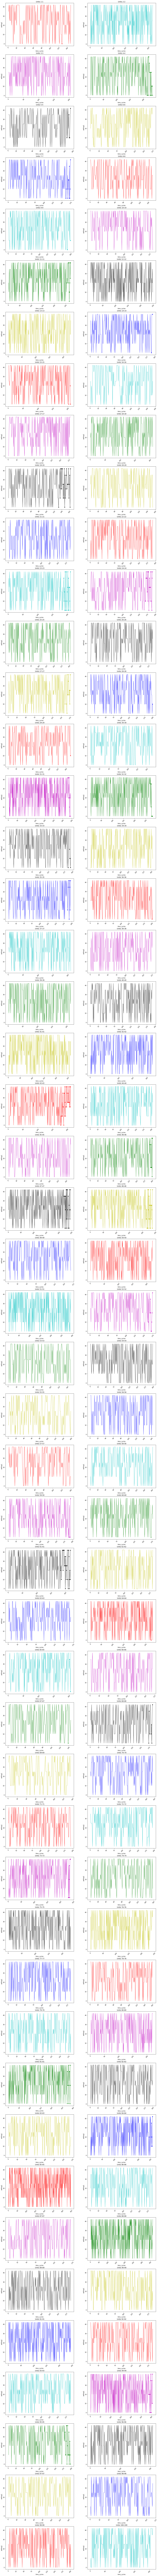

In [21]:
feature = 'setting1'
plot_graphs_label(df=df, feature=feature, units_per_graph=1)